<a href="https://colab.research.google.com/github/ZeeMurphy/Projects-Z/blob/main/Project1test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

https://www.kaggle.com/code/danishmubashar/diabetes-hypertension-predict-acc-97/input

1.
Question: "Does smoking status influence the median blood glucose level in individuals with diabetes, and how does this vary by gender?"
Why it’s interesting: Smoking is a known risk factor for health conditions, and diabetes management often involves controlling blood glucose. Exploring whether smoking impacts median blood glucose among diabetics, and if this differs between genders, could reveal actionable health insights.

Variables involved: smoking (categorical), blood_glucose_level (quantitative), diabetes (binary), gender (categorical).



2. Prepare and Wrangle Data with Pandas and NumPy
Assuming your dataset is in a file called diabetes_data.csv, here’s how to load, clean, and prepare it:



In [151]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [152]:
df.shape

(100000, 9)

In [153]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [154]:
df.describe(include='all')
#Using include='all' gives a comprehensive overview of the data, including both numerical and categorical information.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [155]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [156]:
# remove $, %, commas, and replace empty or invalid cells with NaN
def clean_all_columns(col):
    return col.replace({'\$': '', ',': '', '%': '', '': np.nan, 'NaN': np.nan}, regex=True)

# cleaning function to the entire DataFrame
df = df.apply(clean_all_columns)


In [157]:
print(df.duplicated().sum())

3854


In [158]:
# 1. Remove duplicates
df = df.drop_duplicates()

In [159]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [160]:
no_info_count = df[df["smoking_history"] == "No Info"].shape[0]
print("Number of rows with 'No Info':", no_info_count)

Number of rows with 'No Info': 32887


In [161]:

# 2. Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Remove rows with "No Info" in smoking_history
df_cleaned = df[df["smoking_history"] != "No Info"]



3. Exploratory Data Analysis (EDA) with Matplotlib and Seaborn
Let’s visualize the relationship between smoking, blood glucose, and gender.
Now that we have cleaned the dataset, we proceed with further Exploratory Data Analysis (EDA) to understand its structure, identify patterns, detect outliers, and uncover relationships between variables.


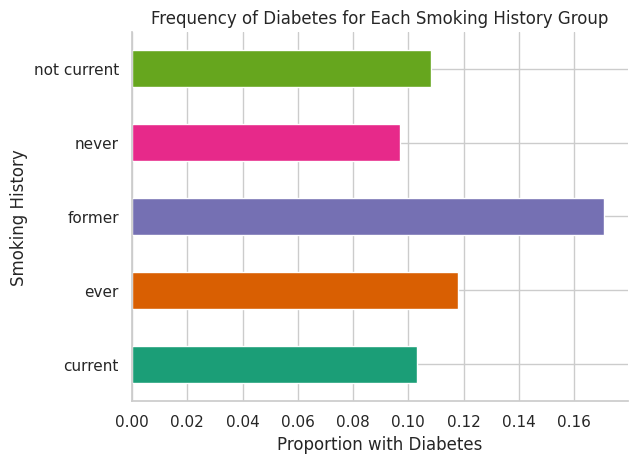

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'smoking_history' and calculate the proportion of diabetes == 1 within each group
smoking_diabetes_freq = df_cleaned.groupby('smoking_history')['diabetes'].mean()

# Plot the bar chart
smoking_diabetes_freq.plot(kind='barh', color=sns.color_palette('Dark2'))

# Add title and labels
plt.title('Frequency of Diabetes for Each Smoking History Group')
plt.xlabel('Proportion with Diabetes')
plt.ylabel('Smoking History')

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


In [163]:
df_cleaned

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Male,19.00,0,0,never,22.74,6.6,85,0
2,Female,52.00,0,0,never,24.27,7.5,220,1
4,Female,22.00,0,0,never,28.78,4.5,200,0
6,Male,62.00,0,0,former,27.32,3.5,158,0
9,Female,18.00,0,0,never,20.97,4.0,160,0
...,...,...,...,...,...,...,...,...,...
96139,Female,48.00,0,0,never,20.98,4.0,140,0
96140,Male,0.64,0,0,never,18.90,6.6,90,0
96142,Male,62.00,0,0,former,28.34,5.7,160,0
96143,Female,56.00,1,0,never,27.22,6.1,200,0


<ipython-input-141-9d4ded44a3c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='hypertension', y='smoking_history', inner='box', palette='coolwarm')


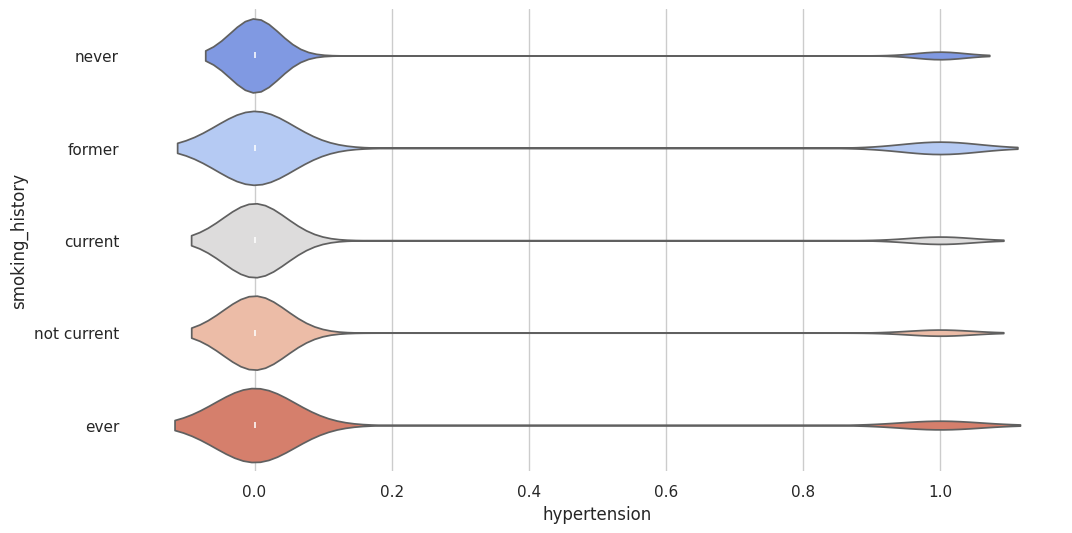

In [141]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cleaned['smoking_history'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='hypertension', y='smoking_history', inner='box', palette='coolwarm')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-142-bb8b5a92efc6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='age', y='smoking_history', inner='box', palette='coolwarm')


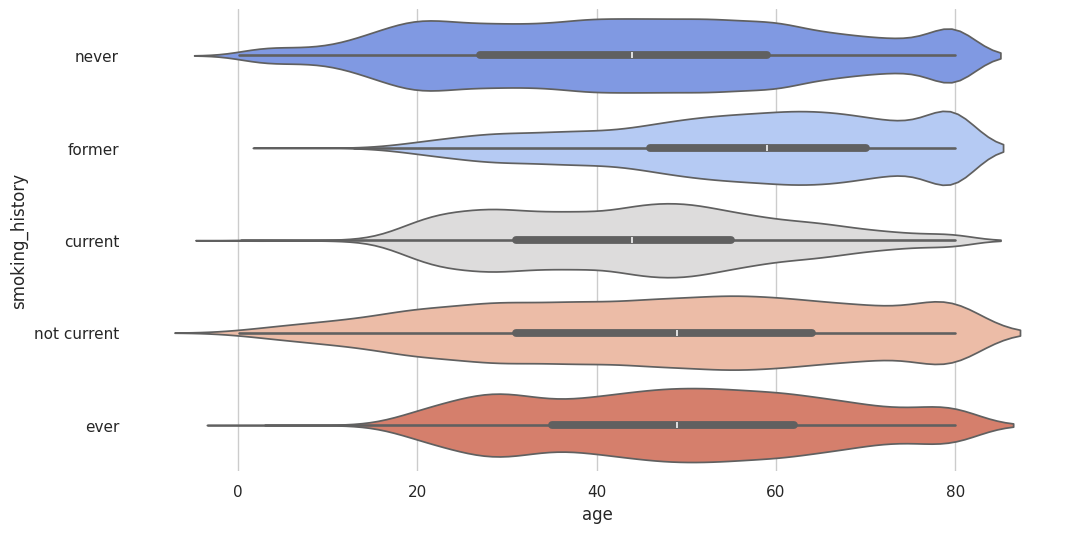

In [142]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cleaned['smoking_history'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='age', y='smoking_history', inner='box', palette='coolwarm')
sns.despine(top=True, right=True, bottom=True, left=True)

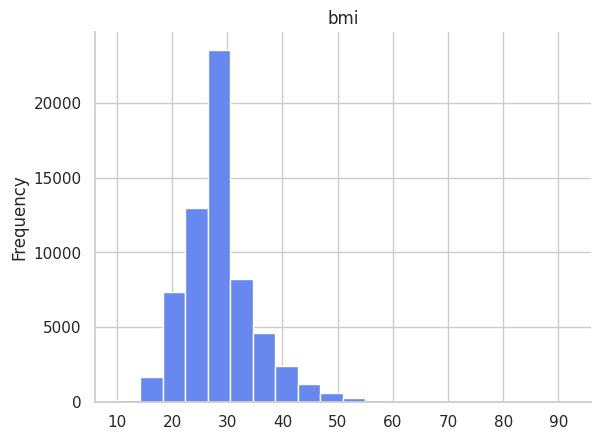

In [143]:
from matplotlib import pyplot as plt
df_cleaned['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

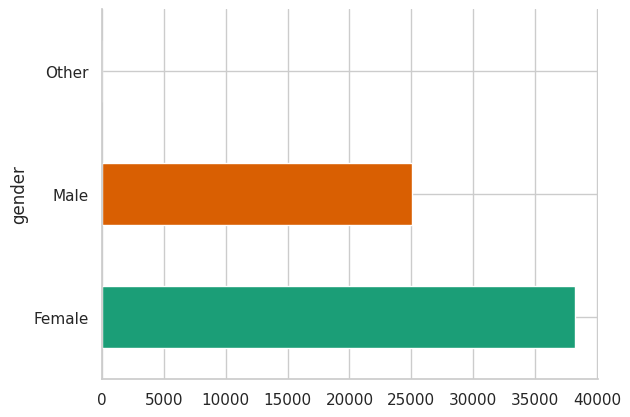

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns
df_cleaned.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

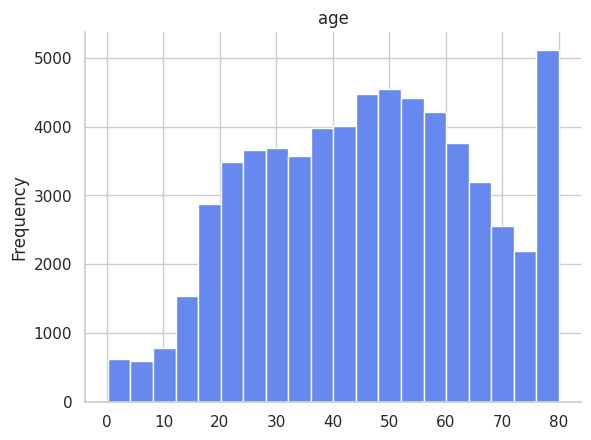

In [145]:
from matplotlib import pyplot as plt
df_cleaned['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)



Barplot by Smoking Status and Gender: This will show the median blood glucose levels by smoking status for each gender.

Violin Plot by Smoking Status and Gender: A violin plot is another great way to show distribution, combining aspects of boxplots and KDE, and can help reveal any differences in distributions between genders and smoking status.

Boxplot by Smoking Status and Gender: This shows how the blood glucose levels vary by smoking status for both genders.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

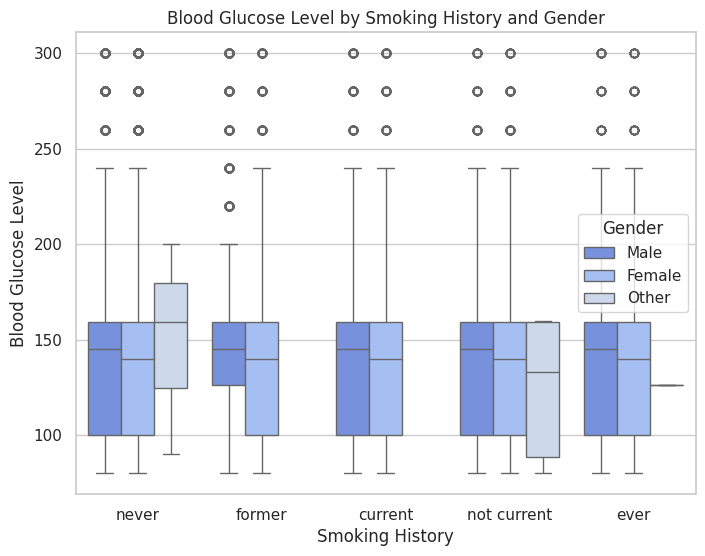

In [146]:
sns.set(style="whitegrid",   palette='coolwarm')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x="smoking_history", y="blood_glucose_level", hue="gender")
plt.title("Blood Glucose Level by Smoking History and Gender")
plt.xlabel("Smoking History")
plt.ylabel("Blood Glucose Level")
plt.legend(title="Gender")
file_path = '/content/diabetes_smoking_plot.png'  # Specify the file path
plt.savefig(file_path)  # Save plot

# Download the saved image file to your local machine
from google.colab import files
files.download(file_path)  # Downloads the plot to your machine

plt.show()

In [147]:
# Count the occurrences of each unique value in the 'gender' column
gender_counts = df_cleaned["gender"].value_counts()

# Print the counts
print(gender_counts)

gender
Female    38192
Male      25055
Other        12
Name: count, dtype: int64


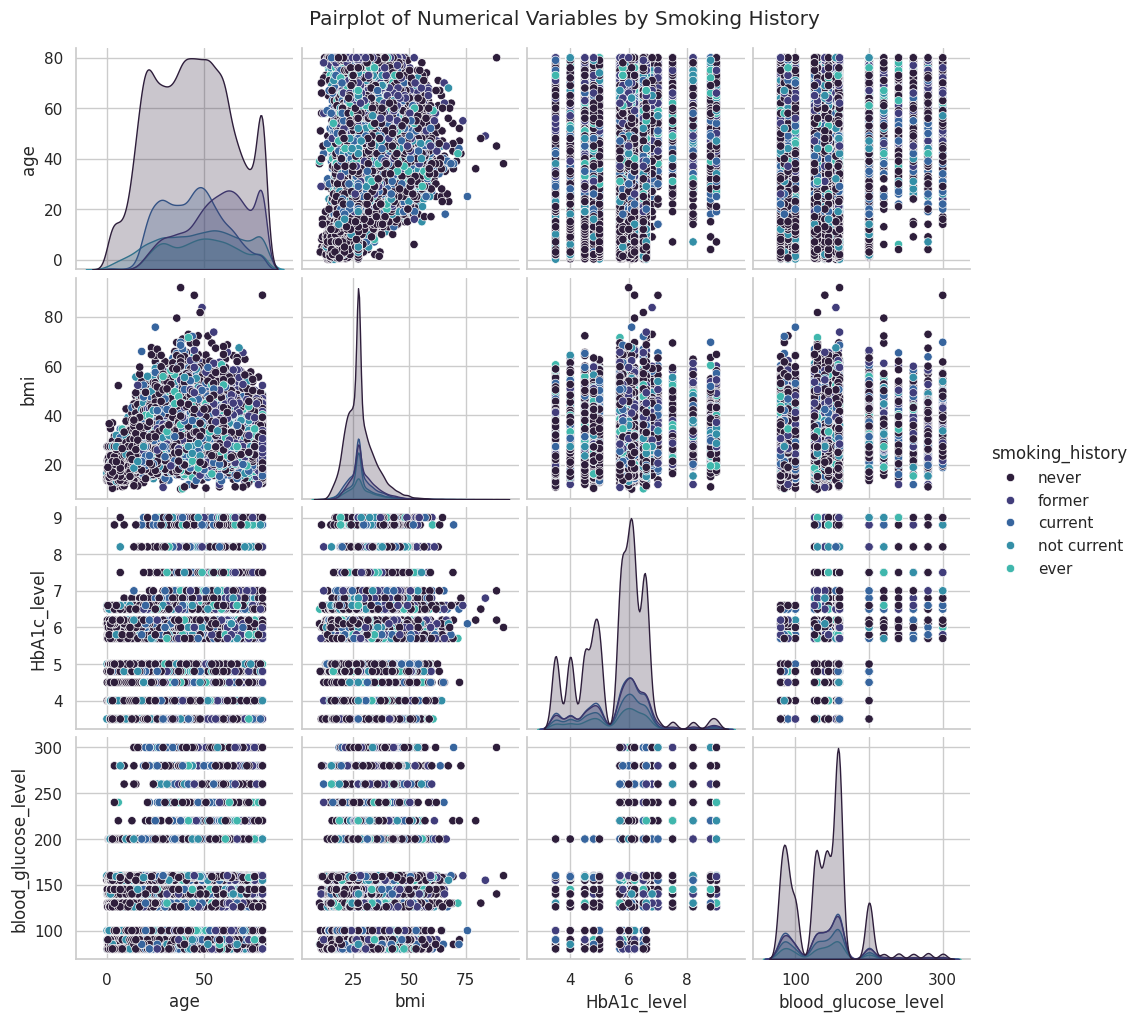

In [148]:
sns.set(style="whitegrid",   palette='mako')
sns.pairplot(df_cleaned,
             vars=["age", "bmi", "HbA1c_level", "blood_glucose_level"],
             hue="smoking_history",
             diag_kind="kde",
             height=2.5)  # Use Kernel Density Estimation for the diagonal plots

# Title for the pairplot
plt.suptitle("Pairplot of Numerical Variables by Smoking History", y=1.02)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

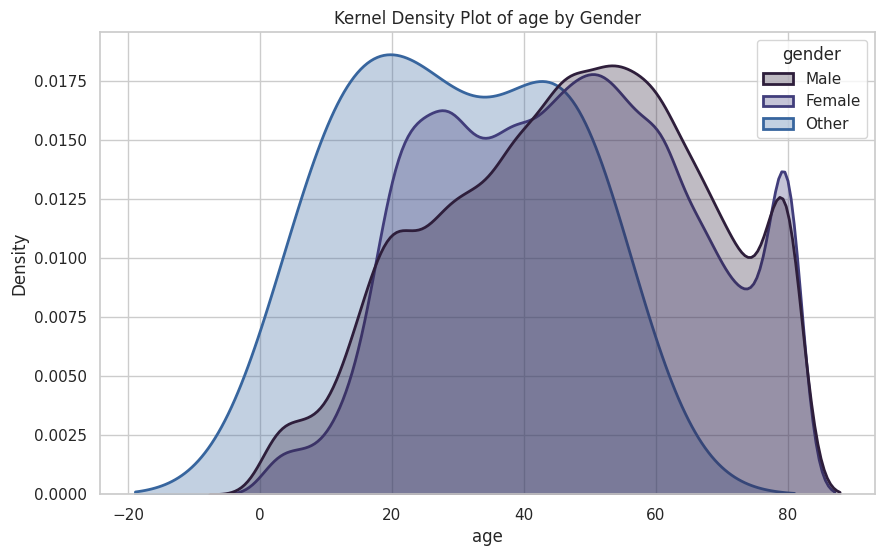

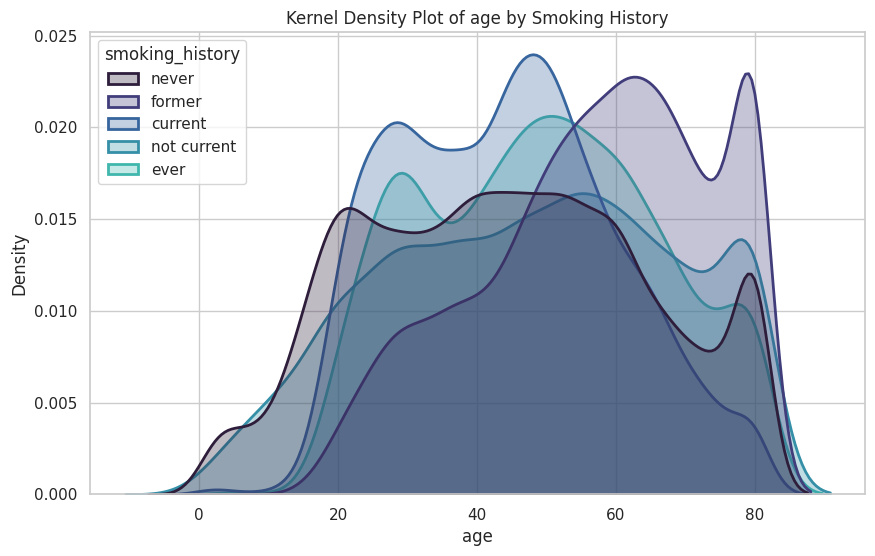

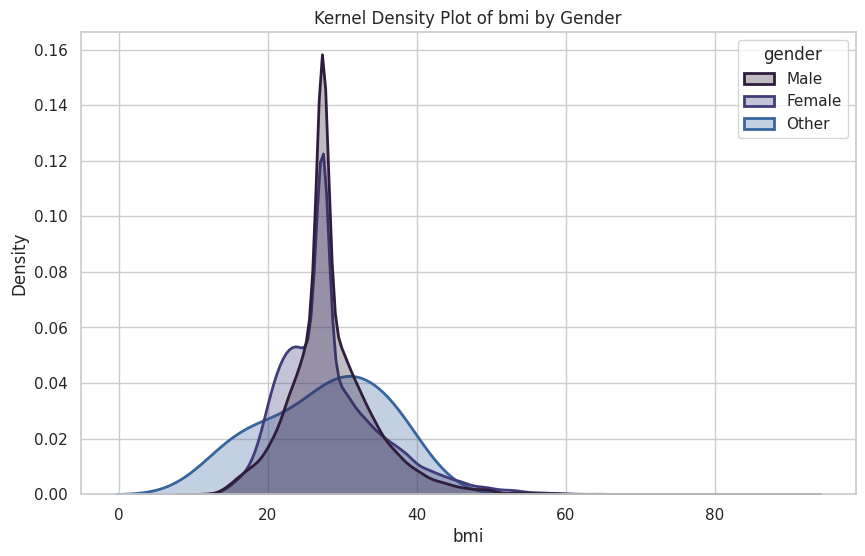

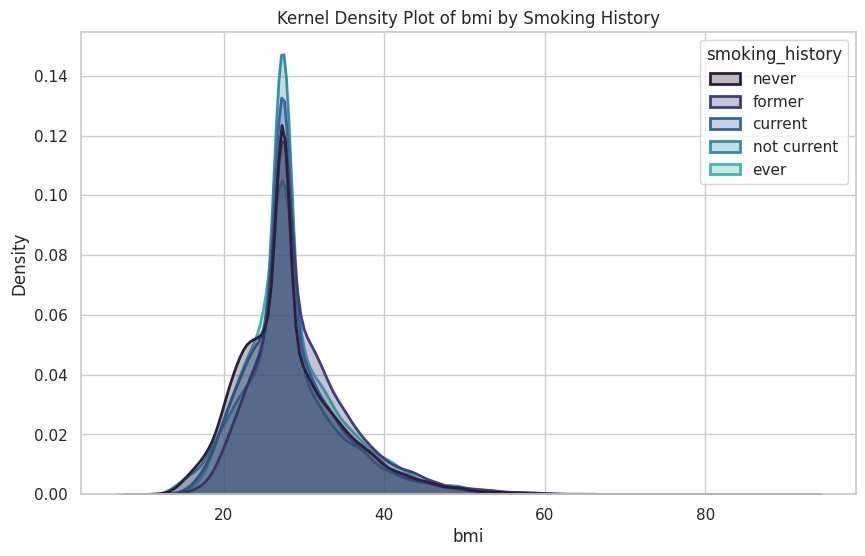

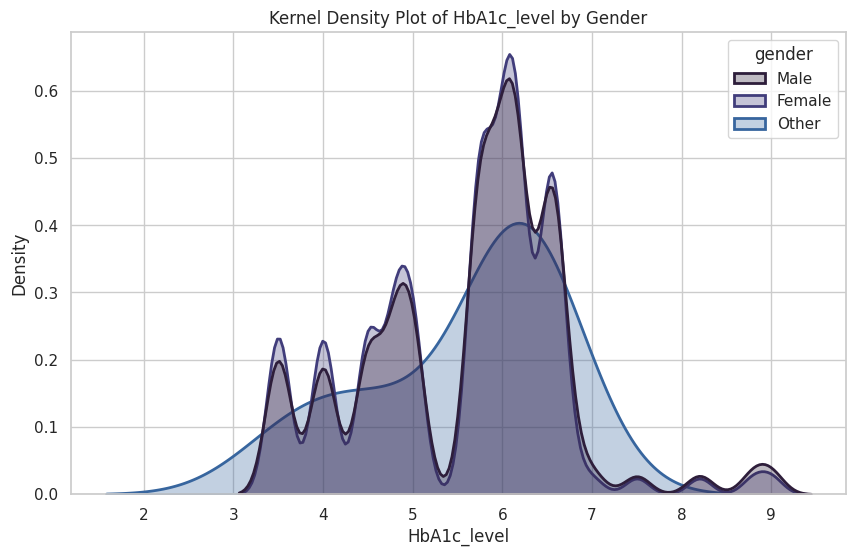

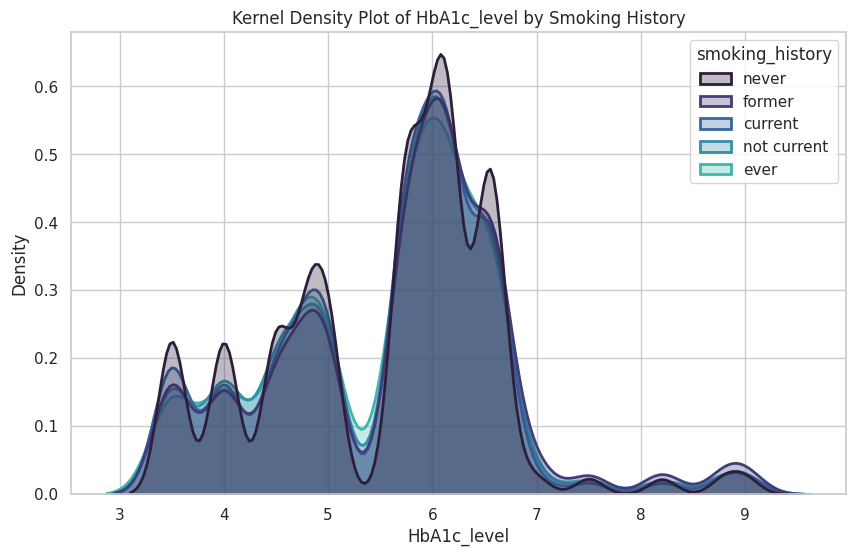

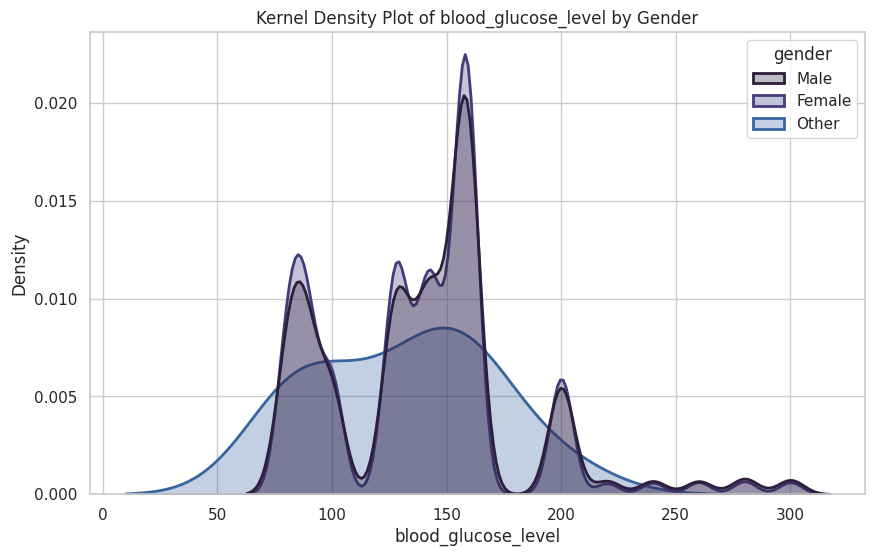

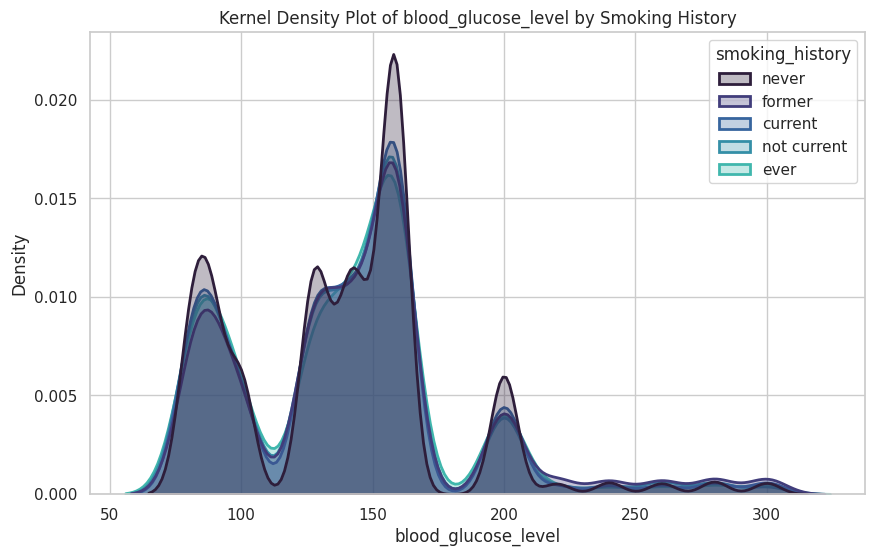

<ipython-input-149-aae531ad9837>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_cleaned, x=col, hue='gender', fill=True, common_norm=False, alpha=0.3, linewidth=2)


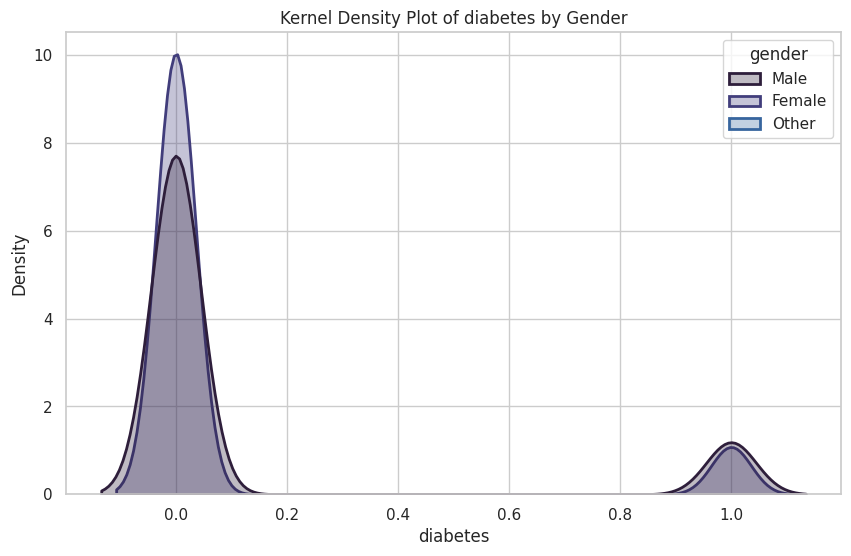

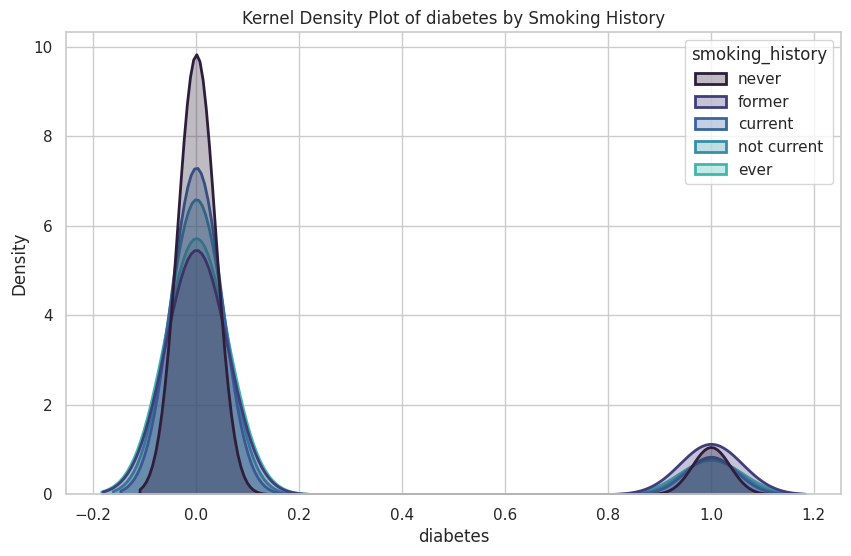

In [149]:

# Create KDE plots for numerical columns with differentiation by gender and smoking_history
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Loop through numerical columns and create a KDE plot for each
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_cleaned, x=col, hue='gender', fill=True, common_norm=False, alpha=0.3, linewidth=2)
    plt.title(f'Kernel Density Plot of {col} by Gender')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_cleaned, x=col, hue='smoking_history', fill=True, common_norm=False, alpha=0.3, linewidth=2)
    plt.title(f'Kernel Density Plot of {col} by Smoking History')
    plt.show()


4. Nonparametric Inference of the Median for Blood Glucose Level
We’ll simulate the median of blood_glucose_level using a bootstrap approach with a sample size of 10% of the data.



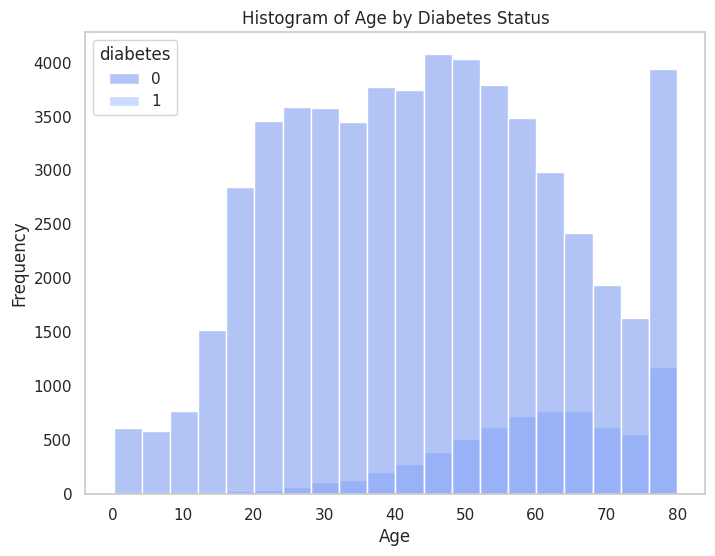

In [165]:
sns.set(style="whitegrid",   palette='coolwarm')
# Create a histogram of age grouped by diabetes status
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='age', hue='diabetes', bins=20, kde=False)

# Adding labels and title
plt.title('Histogram of Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Remove grid
plt.grid(False)

# Show plot
plt.show()


Explanation:
Sample Size: 10% of the diabetic subset (e.g., 500 rows if original is 5000; adjust based on your data).

Bootstrap: Randomly sampled with replacement 1000 times to estimate the median’s variability.

Nonparametric: No distributional assumptions about blood_glucose_level.

Output: Median estimate with a 95% confidence interval, visualized as a histogram.



Notes
Dataset Size: Replace total_rows with len(df_diabetic) based on your actual data. If it’s smaller than 1000 rows, let me know, and I’ll adjust the sample size.

Libraries: Ensure you have pandas, numpy, matplotlib, and seaborn installed (pip install them if needed).

Customization: If your smoking column has specific categories (e.g., "Never", "Former", "Current") or if gender isn’t binary, the code will still work but visuals may adjust.

Run this code in a Python environment (e.g., Jupyter Notebook) with your CSV file, and you’ll have a complete analysis addressing your question! Let me know if you need tweaks or have specific data details to share.


I have a CSV dataset with these columns: gender, age, hypertension, heart disease, smoking, bmi, hbA1c level, blood_glucose_level, diabetes. I want to do statistical analysiz in python. 1: I need to come up with interesting question. 2: I need to Prepare and wrangle your data with Pandas and Nump. 3: Use EDA principles and the Matplotlib/ Seaborn packages to visualize the data.4: Simulate a nonparametric inference of the Median for a quantitative variable in the dataset. The sample size should be about 10% of the data. Use random sampling for the rows.



In [166]:
df_cleaned.groupby("smoking_history")["blood_glucose_level"].median()

,blood_glucose_level
smoking_history,
current,140.0
ever,140.0
former,145.0
never,140.0
not current,140.0


In [167]:
correlation_matrix = df_cleaned.corr(numeric_only=True)
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.253205       0.239489  0.162386   
hypertension         0.253205      1.000000       0.116703  0.129540   
heart_disease        0.239489      0.116703       1.000000  0.037289   
bmi                  0.162386      0.129540       0.037289  1.000000   
HbA1c_level          0.118019      0.086996       0.072939  0.085025   
blood_glucose_level  0.117947      0.087115       0.078933  0.095095   
diabetes             0.262481      0.191552       0.169052  0.203939   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.118019             0.117947  0.262481  
hypertension            0.086996             0.087115  0.191552  
heart_disease           0.072939             0.078933  0.169052  
bmi                     0.085025             0.095095  0.203939  
HbA1c_level             1.000000             0.196032  0.440889  
blood_glucose_level     0.1